In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

In [2]:
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
pio.templates.default = "simple_white"
template = "simple_white"

In [3]:
layout = go.Layout(
    height = 500, width = 800,
    xaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    yaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    legend = dict(
        font = dict(size=20, color='black'),
        bgcolor = "rgba(5,5,25,0.1)",
        bordercolor="black",
        borderwidth=1
    )
)

In [4]:
names = ["0.npy", "0_.npy", "1.npy", "1_.npy", "2.npy", "2_.npy", "3.npy", "3_.npy"]

scores = np.block([np.load(f"scores/{filename}") for filename in names])
parameters = np.block([np.load(f"parameters/{filename}").T for filename in names]).T

In [5]:
scores.shape

(800,)

In [6]:
parameters.shape

(800, 7)

In [7]:
good = scores > 0.75
# scores = scores[good]
# parameters = parameters[good]

In [280]:
# parameters = np.concatenate((parameters, scores.reshape(1, -1).T), axis=1)

In [8]:
parameters_tsne = TSNE(2).fit_transform(parameters)[good]
pca = PCA(2).fit(parameters)
parameters_pca = pca.transform(parameters)[good]

In [9]:
parameters_tsne.shape

(127, 2)

In [10]:
parameters_pca.shape

(127, 2)

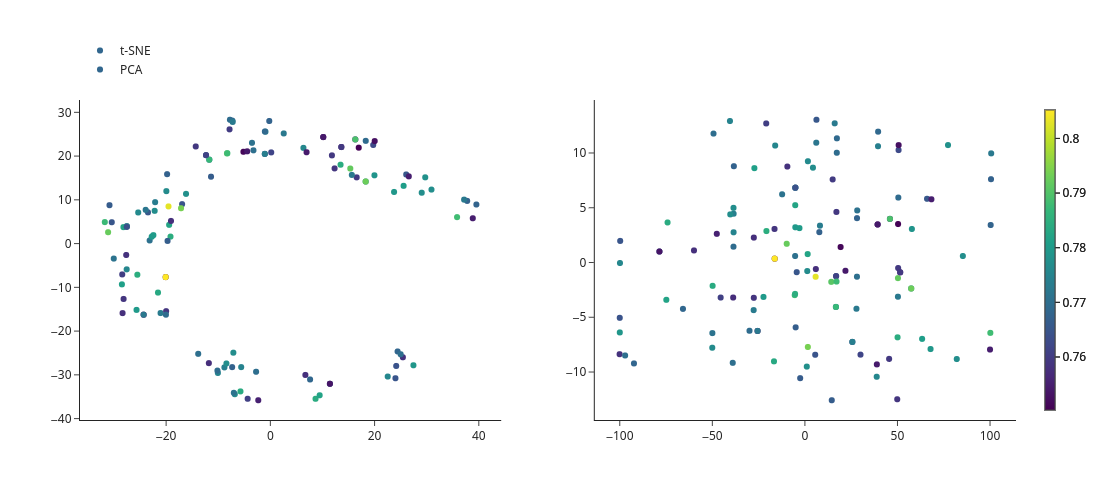

In [11]:
fig = make_subplots(rows=1, cols=2)
# fig.update_layout(layout)
fig.add_scatter(
    x=parameters_tsne[:, 0], y=parameters_tsne[:, 1], marker=dict(color=scores[good], colorscale='Viridis', colorbar=dict(thickness=10)), name="t-SNE",
    mode="markers", row=1, col=1
)
fig.add_scatter(
    x=parameters_pca[:, 0], y=parameters_pca[:, 1], marker=dict(color=scores[good], colorscale='Viridis', colorbar=dict(thickness=10)), name="PCA",
    mode="markers", row=1, col=2
)
fig.update_layout(height=500, width=1000, legend_x=0, legend_y=1.2)

In [235]:
pca.components_[0]

array([-8.45309933e-06, -9.98984058e-01,  2.93395543e-02,  3.40741547e-02,
        1.36966469e-03,  2.66814122e-03, -1.94043929e-06])

In [236]:
pca.components_[1]

array([-7.12838556e-04,  3.83724690e-02,  9.50444941e-01,  3.07758300e-01,
        9.48948933e-03, -1.93968288e-02,  2.30193977e-05])

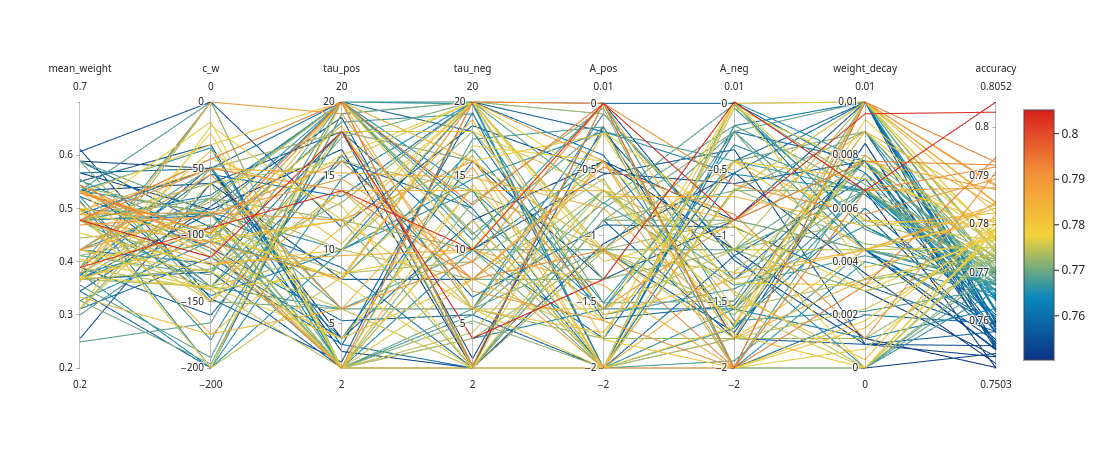

In [15]:
names = ["mean_weight", "c_w", "tau_pos", "tau_neg", "A_pos", "A_neg", "weight_decay"]

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = scores[good],
                   colorscale = 'portland',
                   showscale = True),
        dimensions = [
            dict(
                label=names[i],
                values = parameters[:, i][good], range=(parameters[:, i].min(), parameters[:, i].max())) for i in range(parameters.shape[1])
        ] + [dict(label="accuracy", values=scores[good])]
    )
)
fig.show()

In [39]:
a = np.load("scores/3.npy")
a_ = np.load("scores/3_.npy")

In [40]:
worse = a_ < a

In [41]:
b = a_.copy()

In [42]:
b[worse] = a[worse]

In [43]:
print(a.mean(), a_.mean(), b.mean())

0.417213 0.496984 0.59059


In [45]:
from evolution import DifferentialEvolution, BOUNDS

In [56]:
df = DifferentialEvolution(func=None, population=np.load("parameters/0_.npy"), bounds=BOUNDS)

In [58]:
df.old_population = np.load("parameters/0.npy")

In [59]:
df.scores = np.load("scores/0_.npy")

In [60]:
df.old_scores = np.load("scores/0.npy")

In [61]:
print(df.old_scores.mean(), df.scores.mean())

0.688142 0.63866


In [62]:
df.selection()

In [63]:
print(df.scores.mean())

0.7362089999999999


In [64]:
np.save("parameters/1.npy", df.population)

In [65]:
np.save("scores/1.npy", df.scores)

In [55]:
for i in range(4):
    print(np.load(f"scores/{i}.npy").mean(), np.load(f"scores/{i}_.npy").mean(), np.load(f"scores/{i+1}.npy").mean())

0.688142 0.63866 0.593889
0.593889 0.6375259999999998 0.525458
0.525458 0.52918 0.417213
0.417213 0.496984 0.59059


In [66]:
df.new_generation()

In [ ]:
np.save("parameters/1_.npy", df.population)